# Simulation - Example

Keane and Wolpin (1994) generate three different Monte Carlo samples. We study their first parameterization in more detail now. We label the two occupations as Occupation A and Occupation B. We first plot the returns to experience. Occupation B is more skill intensive in the sense that own experience has higher return than is the case for Occupation A. There is some general skill learned in Occupation A which is transferable to Occupation B. However, work experience is occupation-specific in Occupation B.

In [1]:
%matplotlib agg
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from respy import get_example_model
from respy.clsRespy import RespyCls
from respy.python.interface import respy_interface
from respy.python.shared.shared_constants import ROOT_DIR

In [2]:
plt.style.use(str(ROOT_DIR.parent / "docs" / "respy.mplstyle"))

In [3]:
options_spec, params_spec = get_example_model("kw_data_two")
respy_obj = RespyCls(params_spec, options_spec)

# We have to create this file. Otherwise quadratic experiences are not rescaled
# and the simulation returns nonsense.
open(".restud.respy.scratch", "w").close()

state_space, df = respy_interface(respy_obj, "simulate")

In [4]:
params_spec

para  fixed  lower  upper  \
category      name                                                 
delta         delta                  0.9500  False    0.7    1.0   
coeffs_common return_hs_degree       0.0000  False    NaN    NaN   
              return_col_degree      0.0000  False    NaN    NaN   
coeffs_a      skill_price            9.2100  False    NaN    NaN   
              return_schooling       0.0400  False    NaN    NaN   
              exp_a                  0.0330  False    NaN    NaN   
              exp_a_square          -0.0005  False    NaN    NaN   
              exp_b                  0.0000  False    NaN    NaN   
              exp_b_square          -0.0000  False    NaN    NaN   
              premium_hs             0.0000  False    NaN    NaN   
              premium_col            0.0000  False    NaN    NaN   
              age                    0.0000  False    NaN    NaN   
              minor                  0.0000  False    NaN    NaN   
              not_first              0.0000  False    NaN    NaN   
              no_switch              0.0000  False    NaN    NaN   
              constant               0.0000  False    NaN    NaN   
              first                  0.0000  False    NaN    NaN   
              switch                 0.0000  False    NaN    NaN   
coeffs_b      skill_price            8.2000  False    NaN    NaN   
              return_schooling       0.0800  False    NaN    NaN   
              exp_a                  0.0220  False    NaN    NaN   
              exp_a_square          -0.0005  False    NaN    NaN   
              exp_b                  0.0670  False    NaN    NaN   
              exp_b_square          -0.0010  False    NaN    NaN   
              premium_hs             0.0000  False    NaN    NaN   
              premium_col            0.0000  False    NaN    NaN   
              age                    0.0000  False    NaN    NaN   
              minor                  0.0000  False    NaN    NaN   
              not_first              0.0000  False    NaN    NaN   
              no_switch              0.0000  False    NaN    NaN   
              constant               0.0000  False    NaN    NaN   
              first                  0.0000  False    NaN    NaN   
              switch                 0.0000  False    NaN    NaN   
coeffs_edu    constant            5000.0000  False    NaN    NaN   
              value_col          -5000.0000  False    NaN    NaN   
              value_grad             0.0000  False    NaN    NaN   
              reenroll_col      -15000.0000  False    NaN    NaN   
              reenroll_hs       -15000.0000  False    NaN    NaN   
              age                    0.0000  False    NaN    NaN   
              minor                  0.0000  False    NaN    NaN   
coeffs_home   constant           14500.0000  False    NaN    NaN   
              18_to_20               0.0000  False    NaN    NaN   
              21_plus                0.0000  False    NaN    NaN   
shocks        chol_sigma_1           0.4000  False    NaN    NaN   
              chol_sigma_21          0.0000  False    NaN    NaN   
              chol_sigma_2           0.5000  False    NaN    NaN   
              chol_sigma_31          0.0000  False    NaN    NaN   
              chol_sigma_32          0.0000  False    NaN    NaN   
              chol_sigma_3        6000.0000  False    NaN    NaN   
              chol_sigma_41          0.0000  False    NaN    NaN   
              chol_sigma_42          0.0000  False    NaN    NaN   
              chol_sigma_43          0.0000  False    NaN    NaN   
              chol_sigma_4        6000.0000  False    NaN    NaN   

                                                                           comment  
category      name                                                                  
delta         delta                                                discount factor  
coeffs_common return_hs_degree        retur

In [30]:
ret_schooling_occ_a = params_spec.loc[("coeffs_a", "return_schooling"), "para"]
ret_schooling_occ_b = params_spec.loc[("coeffs_b", "return_schooling"), "para"]

ret_exp_a_occ_a = params_spec.loc[("coeffs_a", "exp_a"), "para"]
ret_exp_a_sq_occ_a = params_spec.loc[("coeffs_a", "exp_a_square"), "para"]
ret_exp_b_occ_a = params_spec.loc[("coeffs_a", "exp_b"), "para"]
ret_exp_b_sq_occ_a = params_spec.loc[("coeffs_a", "exp_b_square"), "para"]
skill_price_occ_a = params_spec.loc[("coeffs_a", "skill_price"), "para"]

x_a, y_a = np.meshgrid(range(0, 20), range(0, 20))

z_a = ret_exp_a_occ_a * x_a + ret_exp_a_sq_occ_a * x_a ** 2 + ret_exp_b_occ_a * y_a + ret_exp_b_sq_occ_a * y_a ** 2
z_a = skill_price_occ_a * np.exp(z_a)

ret_exp_a_occ_b = params_spec.loc[("coeffs_b", "exp_a"), "para"]
ret_exp_a_sq_occ_b = params_spec.loc[("coeffs_b", "exp_a_square"), "para"]
ret_exp_b_occ_b = params_spec.loc[("coeffs_b", "exp_b"), "para"]
ret_exp_b_sq_occ_b = params_spec.loc[("coeffs_b", "exp_b_square"), "para"]
skill_price_occ_b = params_spec.loc[("coeffs_b", "skill_price"), "para"]

x_b, y_b = np.meshgrid(range(0, 20), range(0, 20))

z_b = ret_exp_a_occ_b * x_b + ret_exp_a_sq_occ_b * x_b ** 2 + ret_exp_b_occ_b * y_b + ret_exp_b_sq_occ_b * y_b ** 2
z_b = skill_price_occ_b * np.exp(z_b)

In [31]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax2 = fig.add_subplot(1, 2, 2, projection="3d")

ax1.plot_surface(x_a, y_a, z_a, color="C2")
ax2.plot_surface(x_b, y_b, z_b, color="C3")

for ax in [ax1, ax2]:
    ax.set_xticks(range(0, 21, 5))
    ax.set_yticks(range(0, 21, 5))
    ax.set_zlim(5, 35)
    ax.invert_xaxis()
    ax.set_xlabel("Experience A")
    ax.set_ylabel("Experience B")
    ax.set_proj_type('ortho')
    ax.set_zlabel("Wage", rotation="vertical")
    ax.dist = 10
    
plt.tight_layout()

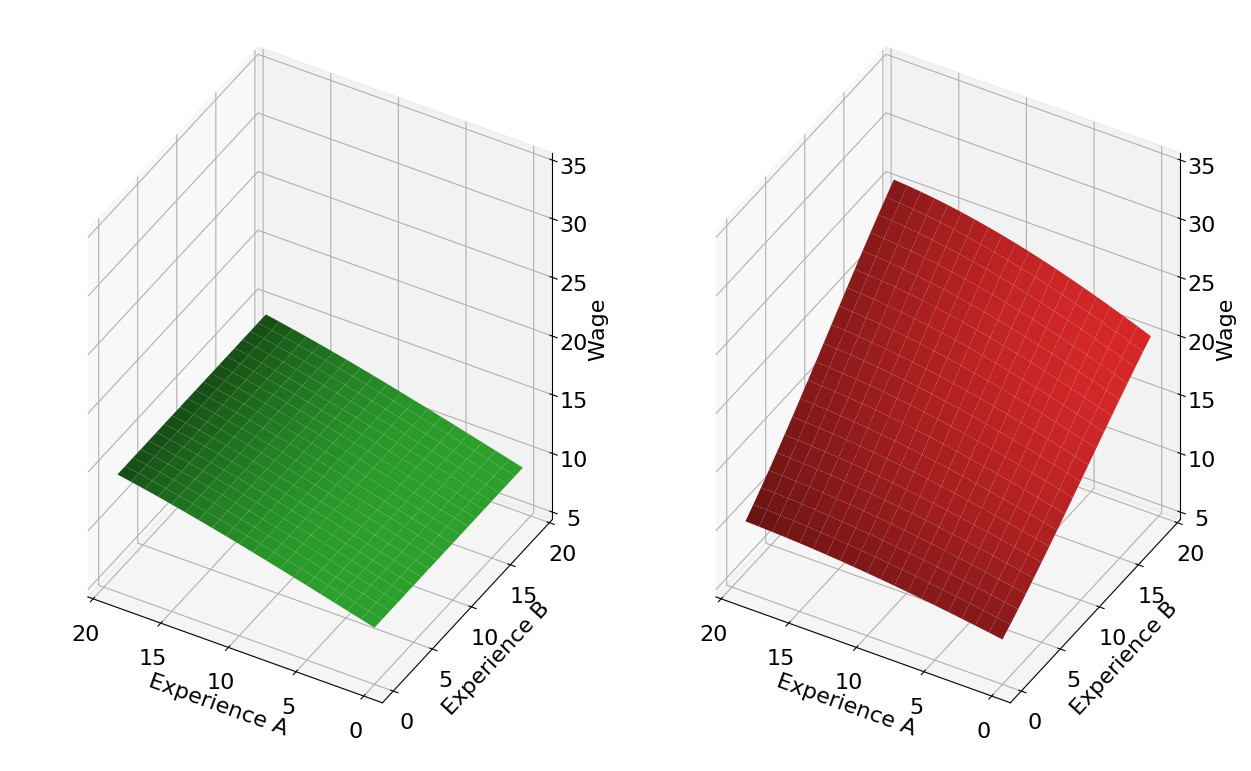

In [32]:
fig

In [22]:
years_schooling = np.arange(10, 21)
wage_a = np.exp(ret_schooling_occ_a * years_schooling) * skill_price_occ_a
wage_b = np.exp(ret_schooling_occ_b * years_schooling) * skill_price_occ_b

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(years_schooling, wage_a, label="Occupation A")
ax.plot(years_schooling, wage_b, label="Occupation B")

ax.set_yticks(range(16, 31, 2))

ax.legend()

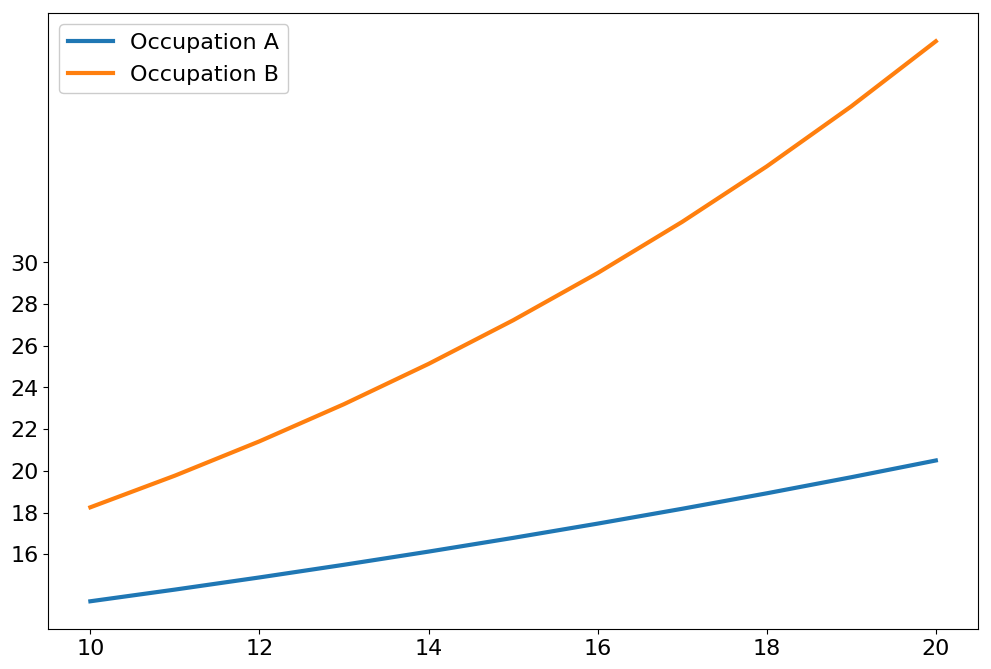

In [23]:
fig

![](images/returns_experience.png)

The next figure shows that the returns to schooling are larger in Occupation B. While its initial wage is lower, it does increase faster with schooling compared to Occupation A.

![](images/returns_schooling.png)

Simulating a sample of 1,000 agents from the model allows us to study how these features interact in determining agent decisions over their life cycle. Note that all agents start out identically, different choices are simply the cumulative effects of different shocks. Initially, 50% of agents increase their level of schooling but the share of agents enrolled in school declines sharply over time. The share working in Occupation A hovers around 40% at first, but then declines to 21%. Occupation B continuously gains in popularity, initially only 11% work in Occupation B but its share increases to about 77%. Around 1.5% stay at home each period. We visualize this choice pattern in detail below.

In [10]:
fig, ax = plt.subplots()

shares = df.groupby("Period").Choice.value_counts().unstack()[[4, 3, 1, 2]].div(1000)

shares.plot.bar(stacked=True, ax=ax, width=0.8)

ax.legend(
    labels=["Home", "School", "Occupation A", "Occupation B"],
    loc="upper center",
    bbox_to_anchor=(0.5, -0.1),
    ncol=4
)

ax.set_ylim(0, 1)

ax.set_xticks(range(0, 40, 5))
ax.set_xticklabels(range(0, 40, 5), rotation="horizontal")

[Text(0, 0, '0'),
 Text(0, 0, '5'),
 Text(0, 0, '10'),
 Text(0, 0, '15'),
 Text(0, 0, '20'),
 Text(0, 0, '25'),
 Text(0, 0, '30'),
 Text(0, 0, '35')]

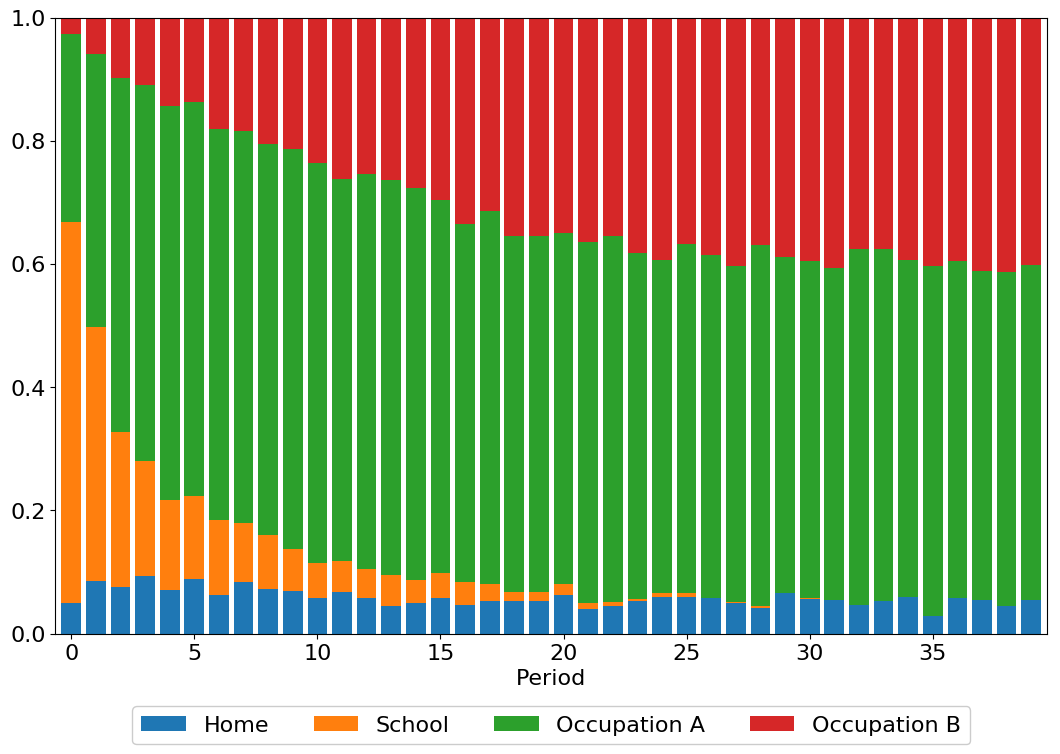

In [11]:
fig

We start out with the large majority of agents working in Occupation A. Eventually, however, most agents ends up working in Occupation B. As the returns to education are higher for Occupation B and previous work experience is transferable, Occupation B gets more and more attractive as agents increase their level of schooling and gain experience in the labor market.